In [1]:
pwd

'/Users/eciel/Desktop/y3s2_sum/orf/summer/privacy_methods/LR/IF+Newton/Server_all_experiments/recursive_all/essay'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
new_pred_k = np.load("new_predictions_essay_bertT_I100_D1.npy", allow_pickle=True).squeeze()
app_k = np.array(np.load("NT_app_k_essay_bertT_I100_D1.npy", allow_pickle=True).squeeze())
old_prediction = np.load("/Users/eciel/Desktop/y3s2_sum/orf/summer/privacy_methods/BERT/Bert_SST/Bert_linew_essay/old_predictions.npy", allow_pickle=True).squeeze()
#exact_ks = np.load("exact_ks_IP.npy", allow_pickle=True)
#pred = np.load("pred.npy", allow_pickle=True)
app_k.shape

(1298,)

In [3]:
pred = old_prediction

In [4]:
new_pred_k_nonon = [new_pred_k[i] for i in range(len(new_pred_k)) if new_pred_k[i] != None]
len(new_pred_k_nonon)

114

# can find smallest k

In [5]:
app_k_nonon = [app_k[i] for i in range(len(new_pred_k)) if new_pred_k[i] != None]
len(new_pred_k_nonon)

114

In [6]:
np.mean(app_k_nonon)

134.97368421052633

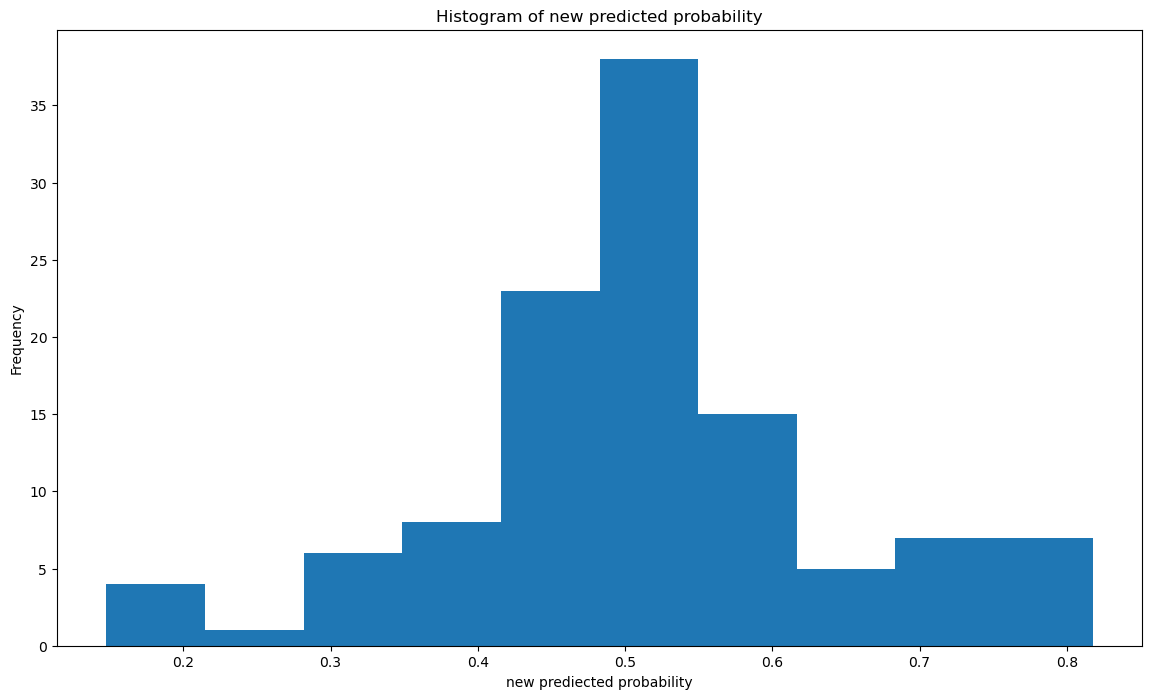

In [7]:
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(new_pred_k_nonon, bins=10)
plt.xlabel("new prediected probability")
plt.ylabel("Frequency")
plt.title("Histogram of new predicted probability")
plt.show()

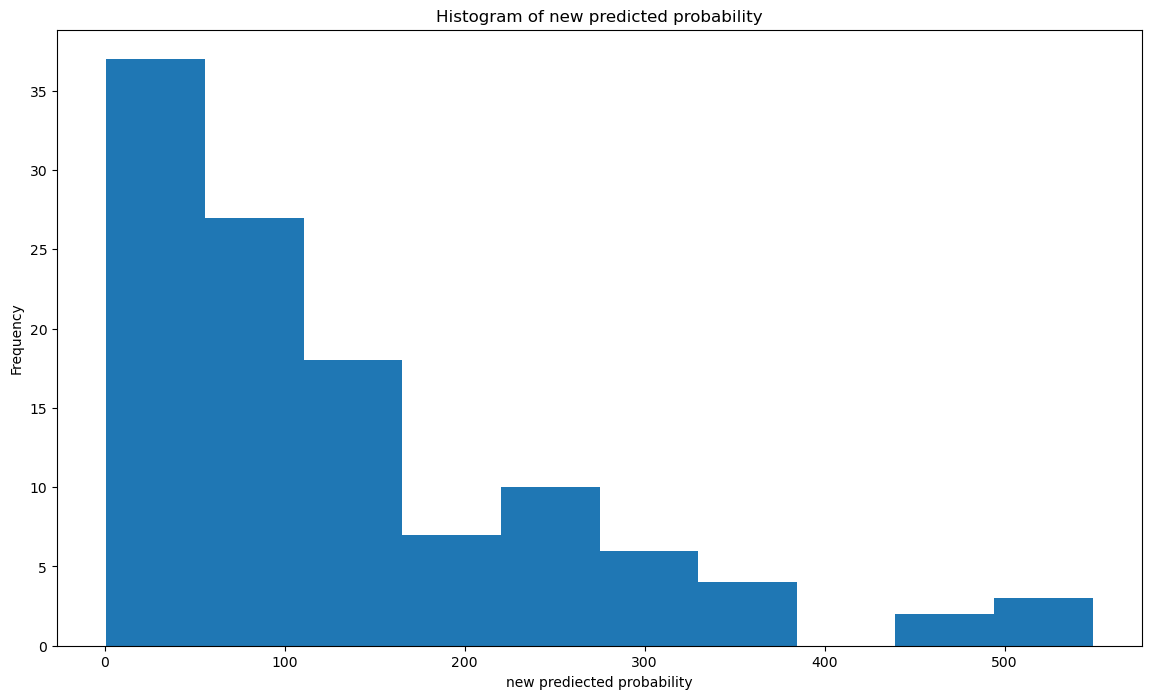

In [8]:

plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(app_k_nonon, bins=10)
plt.xlabel("new prediected probability")
plt.ylabel("Frequency")
plt.title("Histogram of new predicted probability")
plt.show()

In [9]:
flips = np.zeros((len(new_pred_k), 1))
diff = np.zeros((len(new_pred_k), 1))

#1: flip the label, 0: not flip the label, 2: cannot found k
for i in range(1298):
    print("i", i)
    if app_k[i] != None:
        if np.round(pred[i].item()) != np.round(new_pred_k[i].item()):
            flips[i, :] = 1
        else:
            flips[i, :] = 0  
            
        diff[i] = new_pred_k[i] - 0.5
        
        print("old", pred[i].item())
        print("new", new_pred_k[i].item())
        print("appro k", app_k[i])
        print("flip label", flips[i, :])
        print()
        
    else:
        flips[i, :] = 2
        #print("appro k", app_k[i])

i 0
i 1
i 2
i 3
i 4
i 5
i 6
i 7
i 8
i 9
i 10
i 11
i 12
i 13
i 14
i 15
i 16
i 17
i 18
old 0.2740169790320894
new 0.5532653785045609
appro k 100
flip label [1.]

i 19
i 20
old 0.2235924440124421
new 0.5835182558805301
appro k 108
flip label [1.]

i 21
i 22
i 23
i 24
i 25
old 0.8854947912695448
new 0.1674177053560708
appro k 291
flip label [1.]

i 26
i 27
i 28
i 29
i 30
i 31
old 0.14498800139244555
new 0.7594640738930303
appro k 231
flip label [1.]

i 32
i 33
i 34
i 35
i 36
i 37
i 38
i 39
i 40
i 41
i 42
i 43
i 44
i 45
i 46
i 47
i 48
i 49
i 50
i 51
i 52
i 53
old 0.2743841115696208
new 0.5582710590518521
appro k 76
flip label [1.]

i 54
i 55
i 56
i 57
i 58
i 59
i 60
i 61
old 0.4849358771297584
new 0.5038447728636609
appro k 3
flip label [1.]

i 62
i 63
i 64
i 65
i 66
i 67
i 68
i 69
i 70
i 71
i 72
i 73
i 74
i 75
i 76
old 0.7442052407919435
new 0.4344933545545655
appro k 55
flip label [1.]

i 77
i 78
i 79
i 80
i 81
i 82
i 83
i 84
old 0.1465858238131003
new 0.7136399813252433
appro k 274
flip 

In [10]:
# flip the label
num_flip = np.sum([flips[i] == 1 for i in range(len(new_pred_k))])
num_flip

113

In [42]:
app_k.shape

(1298,)

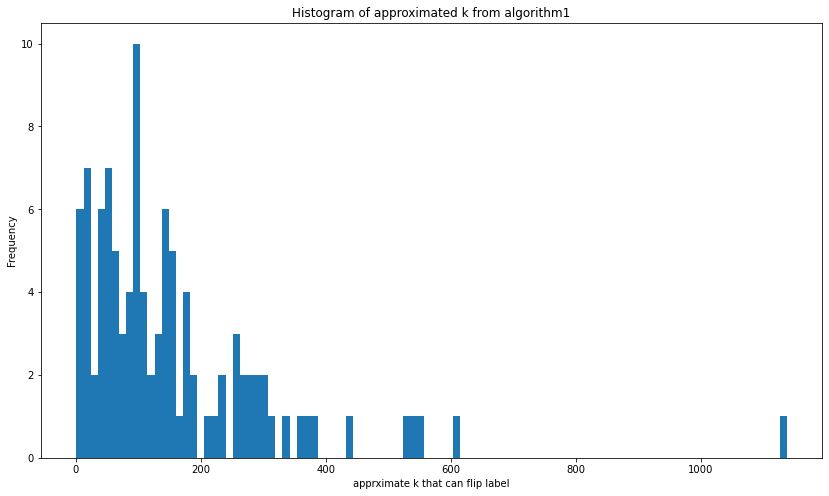

In [43]:

flip_idx = np.array([i for i in range(len(new_pred_k)) if flips[i] == 1 ])
K_flip = app_k[flip_idx]
# Plot exact k distribution
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(K_flip, bins=100)
plt.xlabel("apprximate k that can flip label")
plt.ylabel("Frequency")
plt.title("Histogram of approximated k from algorithm1")
plt.show()

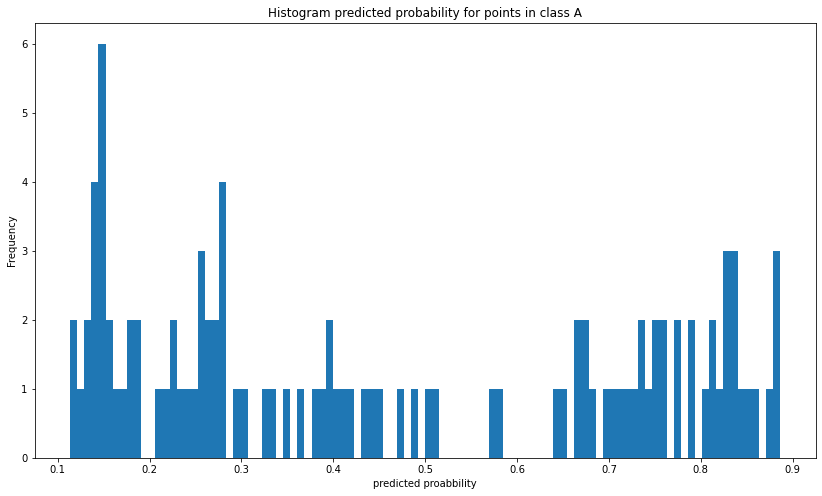

In [44]:
old_prediction
K_flip = old_prediction[flip_idx]
# Plot exact k distribution
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(K_flip, bins=100)
plt.xlabel("predicted proabbility")
plt.ylabel("Frequency")
plt.title("Histogram predicted probability for points in class A")
plt.show()

In [45]:
# not flip the label
num_noflip = np.sum([flips[i] == 0 for i in range(len(new_pred_k))])
num_noflip

11

In [46]:
# diff for those flip the lable
diff1=[diff[i] for i in range(len(new_pred_k)) if flips[i] == 1]
np.mean(np.abs(diff1)), np.var(np.abs(diff1))

(0.3172551715621356, 0.022671883083392685)

In [47]:
# diff for those not flip the lable
diff1=[diff[i] for i in range(len(new_pred_k)) if flips[i] == 0]
np.mean(np.abs(diff1)), np.var(np.abs(diff1))

(0.15947104670877763, 0.01075210297615774)